In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("carprice")

In [4]:
df.head()

,Brand,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
0,Hyundai,VENUE,2021,S MT 1.2 KAPPA,Noida,Petrol,1st Owner,2589,807999
1,Hyundai,Grand i10,2014,ASTA 1.2 AT VTVT Automatic,Noida,Petrol,1st Owner,26779,420000
2,Hyundai,Grand i10,2017,MAGNA 1.2 KAPPA VTVT Manual,Noida,Petrol,1st Owner,9249,442199
3,Hyundai,Elite i20,2018,Magna Executive 1.2 Manual,Noida,Petrol,1st Owner,5937,577399
4,Hyundai,i20,2013,ERA 1.4 CRDI Manual,Noida,Diesel,1st Owner,32281,318699


In [5]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [6]:
df.head()

,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
0,VENUE,2021,S MT 1.2 KAPPA,Noida,Petrol,1st Owner,2589,807999
1,Grand i10,2014,ASTA 1.2 AT VTVT Automatic,Noida,Petrol,1st Owner,26779,420000
2,Grand i10,2017,MAGNA 1.2 KAPPA VTVT Manual,Noida,Petrol,1st Owner,9249,442199
3,Elite i20,2018,Magna Executive 1.2 Manual,Noida,Petrol,1st Owner,5937,577399
4,i20,2013,ERA 1.4 CRDI Manual,Noida,Diesel,1st Owner,32281,318699


In [7]:
df.shape

(5609, 8)

In [8]:
df.isnull().sum()

Model               0
Year                0
Variant             0
Location            0
version             0
Number of Owners    0
KmDriven            0
Price               0
dtype: int64

In [9]:
df.dtypes


Model               object
Year                 int64
Variant             object
Location            object
version             object
Number of Owners    object
KmDriven             int64
Price                int64
dtype: object

In [10]:
df["Price"] = df["Price"].astype(int)


In [11]:
df.dtypes


Model               object
Year                 int64
Variant             object
Location            object
version             object
Number of Owners    object
KmDriven             int64
Price                int32
dtype: object

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Model']=le.fit_transform(df['Model'])
df['Year']=le.fit_transform(df['Year'])

df['Variant']=le.fit_transform(df['Variant'])
df['Location']=le.fit_transform(df['Location'])
df['version']=le.fit_transform(df['version'])

df['Number of Owners']=le.fit_transform(df['Number of Owners'])

In [14]:
df


,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
0,108,14,389,6,2,0,2589,807999
1,54,7,212,6,2,0,26779,420000
2,54,10,345,6,2,0,9249,442199
3,41,11,359,6,2,0,5937,577399
4,129,6,255,6,0,0,32281,318699
...,...,...,...,...,...,...,...,...
5604,43,8,481,7,0,0,88216,596699
5605,129,6,429,7,2,0,113370,329699
5606,34,8,103,7,0,0,99645,782299
5607,69,8,89,7,3,0,108687,505199


In [15]:
df_cor=df.corr()


In [16]:
df_cor


,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
Model,1.000000,-0.216313,0.185027,0.060198,-0.193640,0.054870,0.201725,-0.010156
Year,-0.216313,1.000000,-0.034427,-0.068976,-0.060633,-0.273285,-0.433049,0.597801
Variant,0.185027,-0.034427,1.000000,-0.075248,-0.087207,-0.061015,0.000832,-0.121981
Location,0.060198,-0.068976,-0.075248,1.000000,-0.107816,0.008148,0.088896,0.018143
version,-0.193640,-0.060633,-0.087207,-0.107816,1.000000,0.064414,-0.338634,-0.376419
Number of Owners,0.054870,-0.273285,-0.061015,0.008148,0.064414,1.000000,0.125883,-0.173718
KmDriven,0.201725,-0.433049,0.000832,0.088896,-0.338634,0.125883,1.000000,-0.141915
Price,-0.010156,0.597801,-0.121981,0.018143,-0.376419,-0.173718,-0.141915,1.000000


Price is highly correlate with Year and least correlate with Brand.

# Data Visualizations¶


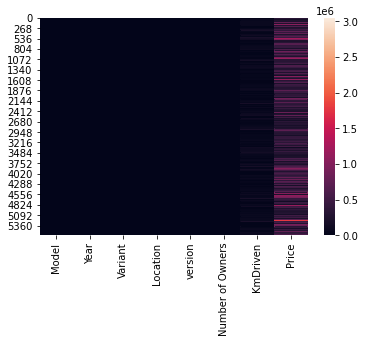

In [17]:
sns.heatmap(df)


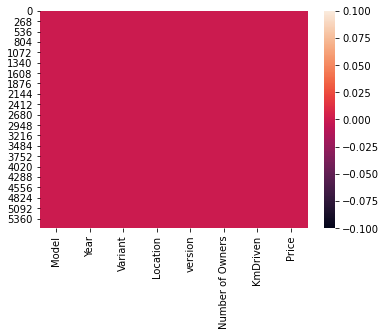

In [18]:
sns.heatmap(df.isnull())


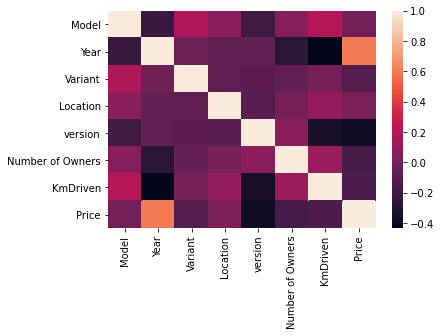

In [19]:
sns.heatmap(df_cor)


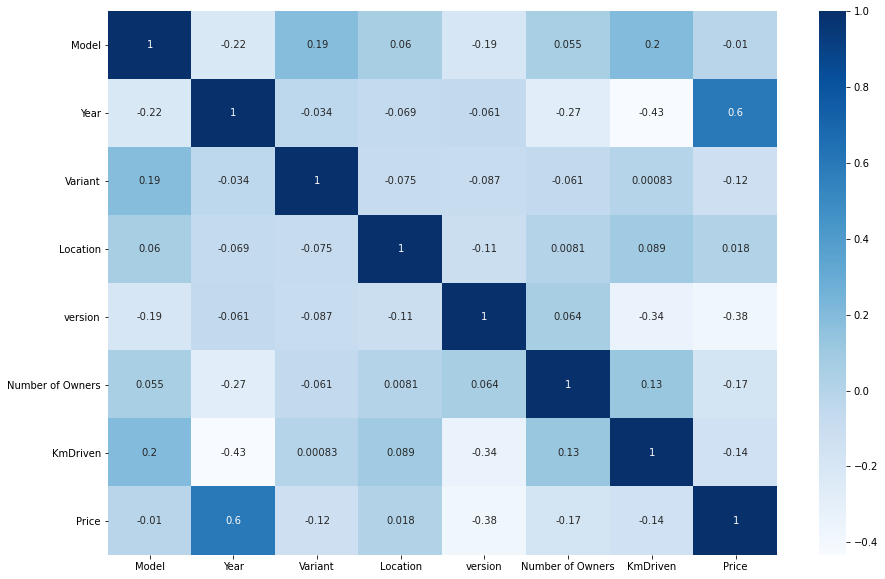

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cor,cmap='Blues',annot=True)

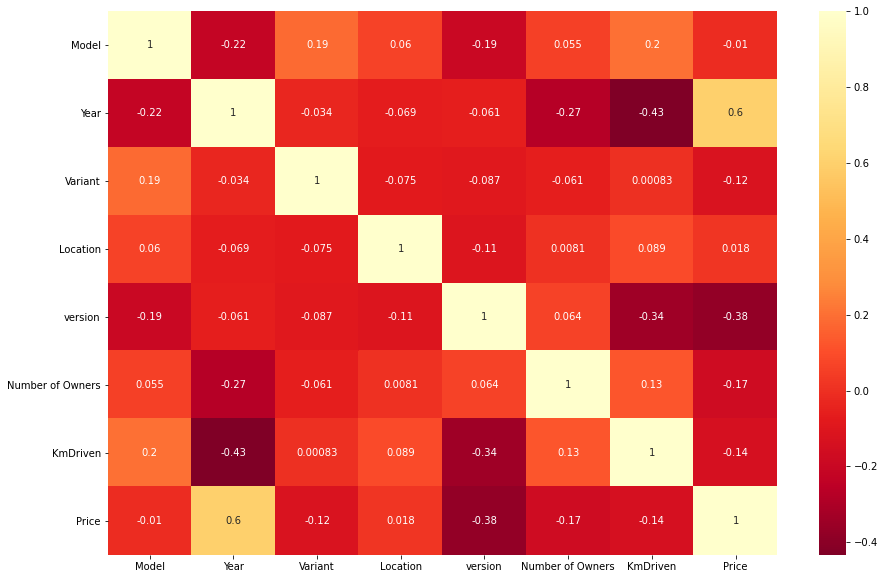

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df_cor,cmap='YlOrRd_r',annot=True)

In [22]:
df.columns


Index(['Model', 'Year', 'Variant', 'Location', 'version', 'Number of Owners',
       'KmDriven', 'Price'],
      dtype='object')

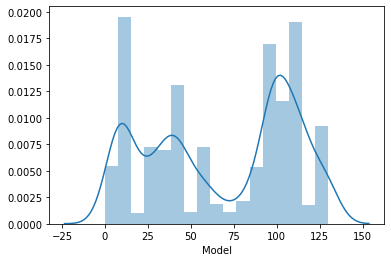

In [24]:
sns.distplot(df['Model'])


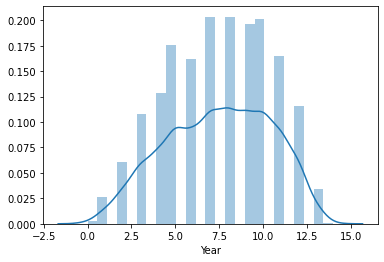

In [25]:
sns.distplot(df['Year'])


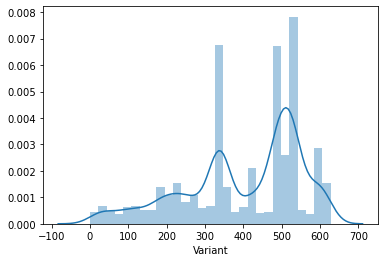

In [26]:
sns.distplot(df['Variant'])


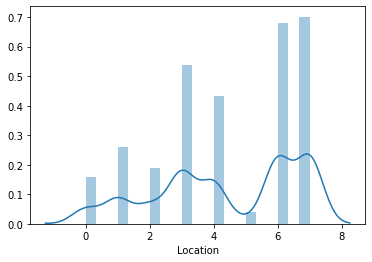

In [27]:
sns.distplot(df['Location'])


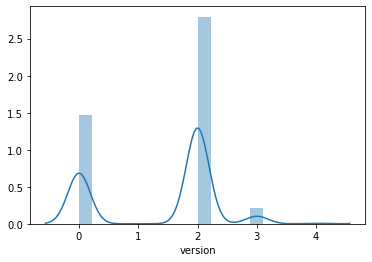

In [28]:
sns.distplot(df['version'])


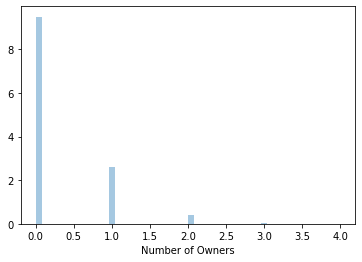

In [29]:
sns.distplot(df['Number of Owners'])


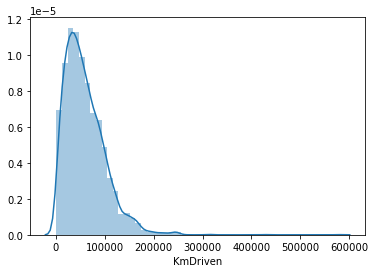

In [30]:
sns.distplot(df['KmDriven'])


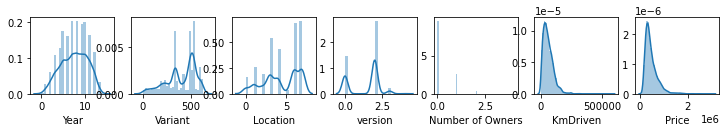

In [31]:
collist=df.columns.values
ncol=14
nrows=15
plt.figure(figsize=(25,25))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

bivariate analysis

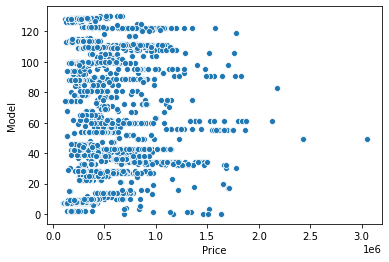

In [32]:
sns.scatterplot(x='Price',y='Model',data=df)


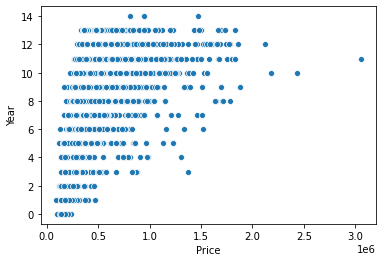

In [33]:
sns.scatterplot(x='Price',y='Year',data=df)


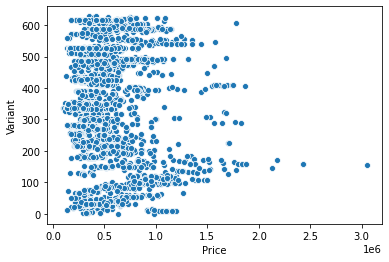

In [34]:
sns.scatterplot(x='Price',y='Variant',data=df)


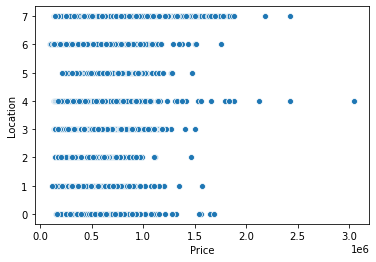

In [35]:
sns.scatterplot(x='Price',y='Location',data=df)


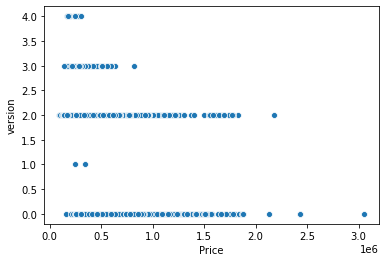

In [36]:
sns.scatterplot(x='Price',y='version',data=df)


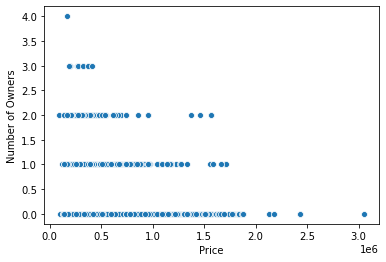

In [37]:
sns.scatterplot(x='Price',y='Number of Owners',data=df)


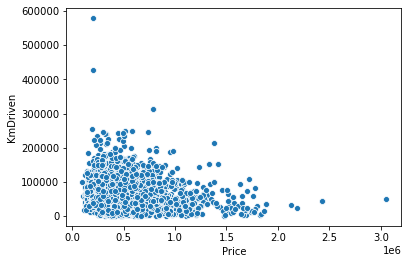

In [38]:
sns.scatterplot(x='Price',y='KmDriven',data=df)


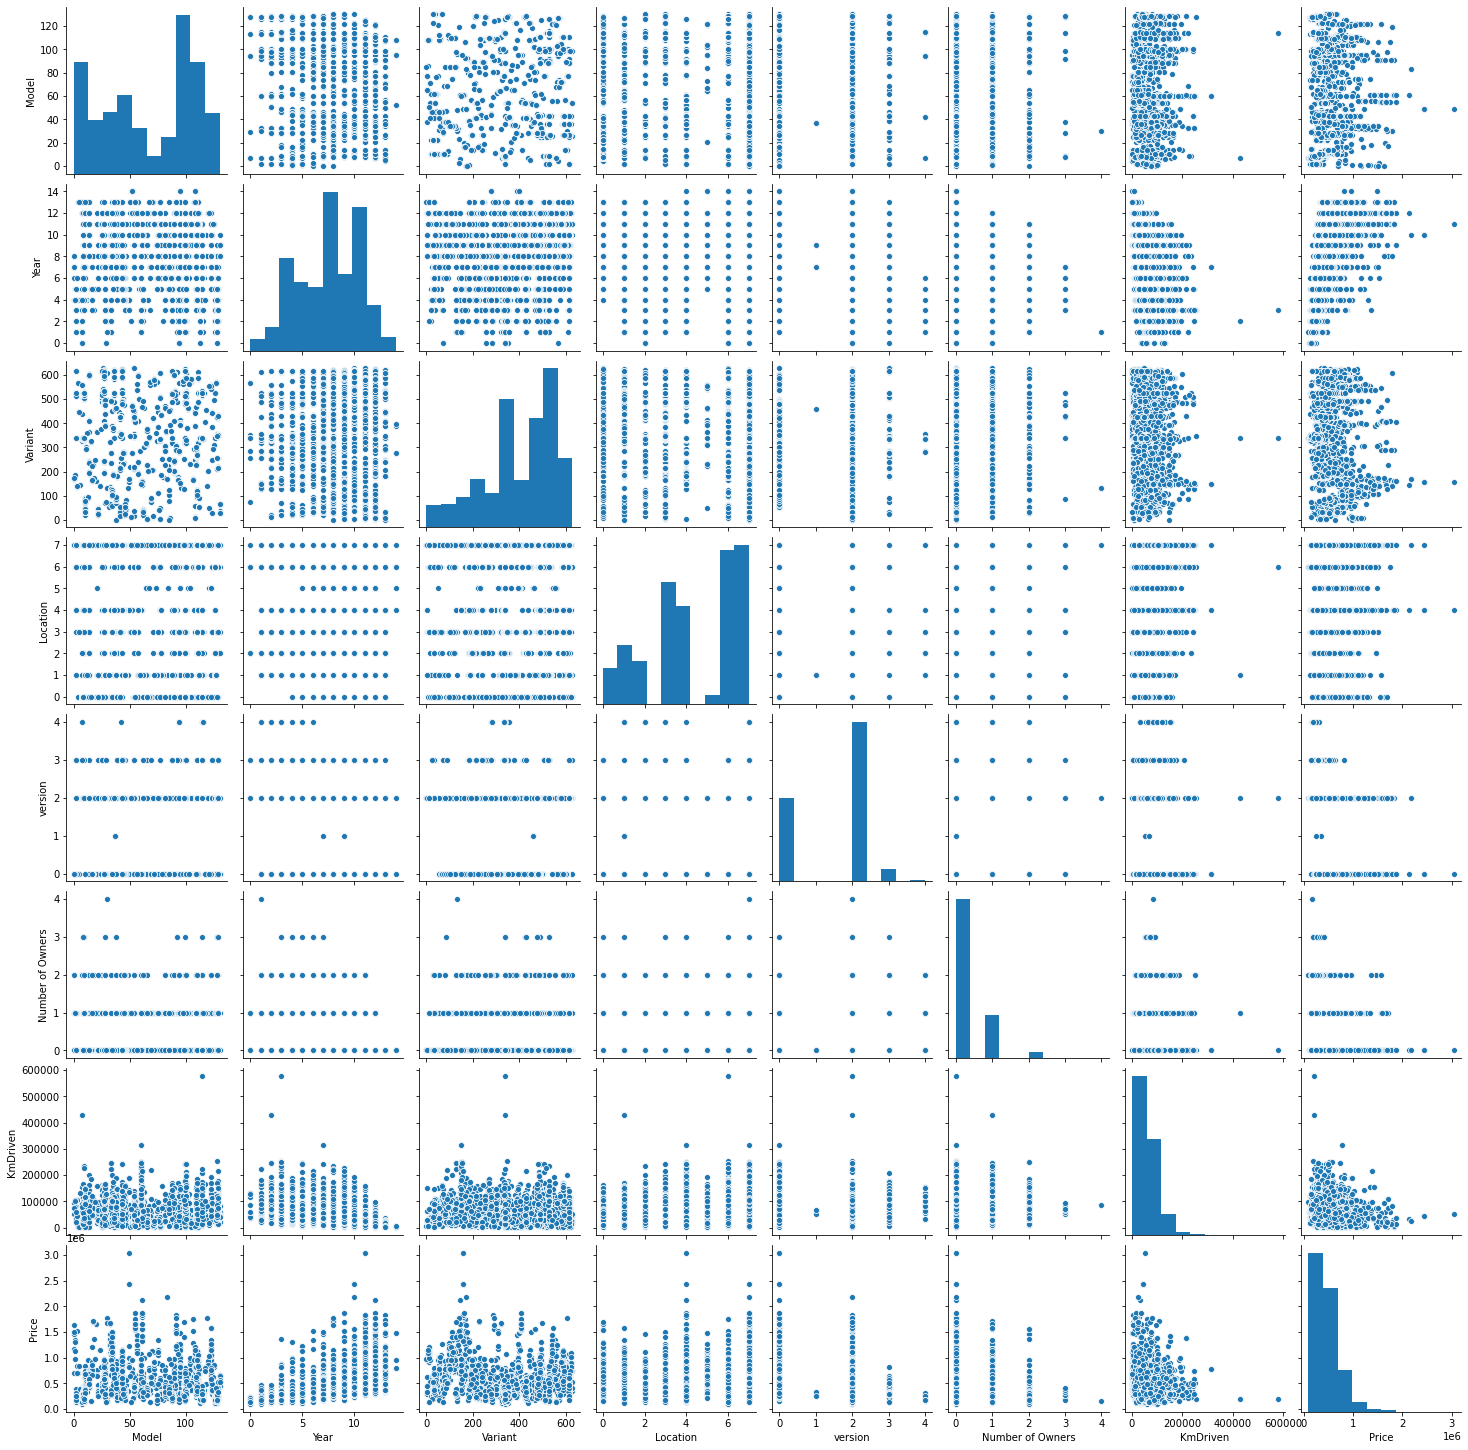

In [39]:
sns.pairplot(df)


# outliers

In [40]:
#using box plot in for loop for ouliers checking
collist=df.columns.values
ncol=10
nrows=14

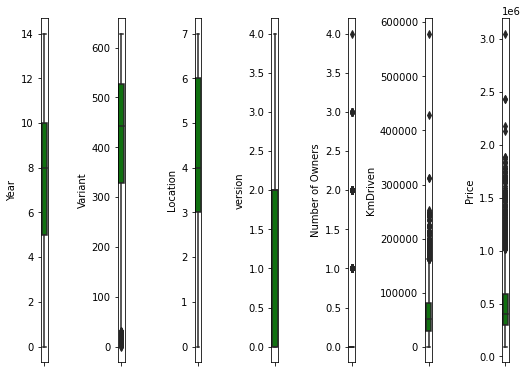

In [41]:
plt.figure(figsize=(ncol,7*ncol))
for i in range(1, len(collist)):
           plt.subplot(nrows,ncol,i+1)
           sns.boxplot(df[collist[i]],color='green',orient='v')
           plt.tight_layout()

there are outliers present 

# removing outliers

In [42]:
#using IQR method to remove outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR= Q3 - Q1
print(IQR)

Model                   72.0
Year                     5.0
Variant                198.0
Location                 3.0
version                  2.0
Number of Owners         0.0
KmDriven             53181.0
Price               288500.0
dtype: float64


# Removing skewness

In [44]:
df.skew()

Model              -0.160912
Year               -0.183057
Variant            -0.698830
Location           -0.373517
version            -0.508579
Number of Owners    1.887131
KmDriven            1.609155
Price               1.964592
dtype: float64

In [45]:
x=df.iloc[:,0:8]


In [46]:
from sklearn.preprocessing import PowerTransformer
power=PowerTransformer(method='yeo-johnson',standardize=True)
df_new=power.fit_transform(x)
df1=pd.DataFrame(df_new,columns=x.columns)

In [47]:
df1.head()


,Model,Year,Variant,Location,version,Number of Owners,KmDriven,Price
0,0.937757,2.252209,-0.162300,0.72158,0.570414,-0.562696,-2.380738,0.0
1,-0.216580,-0.170888,-1.280378,0.72158,0.570414,-0.562696,-0.754786,0.0
2,-0.216580,0.855706,-0.462882,0.72158,0.570414,-0.562696,-1.673202,0.0
3,-0.539631,1.202184,-0.368717,0.72158,0.570414,-0.562696,-1.959198,0.0
4,1.336248,-0.508028,-1.032498,0.72158,-1.375749,-0.562696,-0.551403,0.0


In [48]:
df1.skew()


Model              -0.343452
Year               -0.139372
Variant            -0.405663
Location           -0.288460
version            -0.382631
Number of Owners    1.215093
KmDriven           -0.017653
Price               0.000000
dtype: float64

In [49]:
y=df.iloc[:,-1]


In [50]:
y

0       807999
1       420000
2       442199
3       577399
4       318699
         ...  
5604    596699
5605    329699
5606    782299
5607    505199
5608    253399
Name: Price, Length: 5609, dtype: int32

In [51]:
x.shape


(5609, 8)

In [52]:
y.shape


(5609,)

# Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
df_=mms.fit_transform(df1)
df_x=pd.DataFrame(df_)

In [54]:
x=df_x


In [55]:
x

,0,1,2,3,4,5,6,7
0,0.874885,1.000000,0.517882,0.8437,0.437191,0.0,0.056606,0.0
1,0.528513,0.483375,0.225180,0.8437,0.437191,0.0,0.254519,0.0
2,0.528513,0.702254,0.439192,0.8437,0.437191,0.0,0.142729,0.0
3,0.431577,0.776126,0.463844,0.8437,0.437191,0.0,0.107917,0.0
4,0.994456,0.411494,0.290072,0.8437,0.000000,0.0,0.279276,0.0
...,...,...,...,...,...,...,...,...
5604,0.447018,0.555834,0.693204,1.0000,0.000000,0.0,0.447323,0.0
5605,0.994456,0.411494,0.592391,1.0000,0.437191,0.0,0.500266,0.0
5606,0.375694,0.555834,0.083859,1.0000,0.000000,0.0,0.472403,0.0
5607,0.632186,0.555834,0.068701,1.0000,0.706070,0.0,0.491006,0.0


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)


In [57]:
x_train.shape


(3758, 8)

In [58]:
x_test.shape


(1851, 8)

In [59]:
y_train.shape


(3758,)

In [60]:
y_test.shape


(1851,)

In [61]:
lr=LinearRegression()


In [62]:
lr.fit(x_train,y_train)


LinearRegression()

In [63]:
lr.coef_


array([  76218.82451647,  723045.88891599, -123032.30869293,
         14946.97627045, -390411.01230251,    7796.87168868,
        -20049.25550653,       0.        ])

In [64]:
lr.intercept_


236697.47764067748

In [65]:
lr.score(x_train,y_train)


0.4911433275387007

In [66]:
#predict the values
pred=lr.predict(x_test)
print("predicted result price:",pred)
print("actual price:",y_test)

predicted result price: [485908.25142213 491656.60855728 514623.30196244 ... 235381.34568585
 649009.60537402 575634.91523838]
actual price: 1020    391999
4038    449099
3316    374199
2868    504399
3447    440000
         ...  
2251    357299
2699    460099
1691    389599
5012    669299
3536    490199
Name: Price, Length: 1851, dtype: int32


In [67]:
print("error :")
print('Mean absolute error :',mean_absolute_error(y_test,pred))
print('Mean squared error :',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error :
Mean absolute error : 122943.91275353583
Mean squared error : 33416442435.331585
Root Mean Squared Error: 182801.64779162026


In [68]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.501827985654536


# Ensemble Techniques


In [69]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))

0.9018774889899883
6581873622.676932


In [70]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(r2_score(y_test,predad))
print(mean_squared_error(y_test,predad))

0.3729624418173033
42060500920.21544


RandomForestRegressor model is a best model as it gives maximum r2score.

In [71]:
import joblib
joblib.dump(rf,'carRate.obj')

['carRate.obj']

In [72]:
file=joblib.load('carRate.obj')


In [73]:
file.predict(x_test)


array([377601.  , 417763.95, 379486.01, ..., 373275.  , 746342.02,
       504401.12])